In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize , MinMaxScaler
from sklearn.metrics import silhouette_score


In [49]:
df = pd.read_csv('/content/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [51]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)


CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [52]:
round(df.isnull().sum(axis=1)*100/df.shape[1],2)

0       0.00
1       0.00
2       0.00
3       5.56
4       0.00
        ... 
8945    0.00
8946    5.56
8947    0.00
8948    0.00
8949    0.00
Length: 8950, dtype: float64

In [53]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [54]:
df.duplicated().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe90dc61e50>,
      dtype=object)

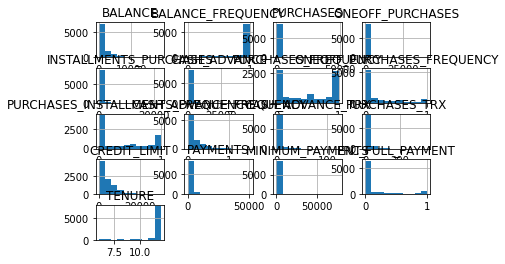

In [55]:
df.hist()

### Handling Missing Values

In [56]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [57]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)


In [58]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,864.304943,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2330.700932,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,335.657631,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,864.304943,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [59]:
df = df.drop('CUST_ID', axis = 1) 

###The outliers

In [60]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY',
        'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

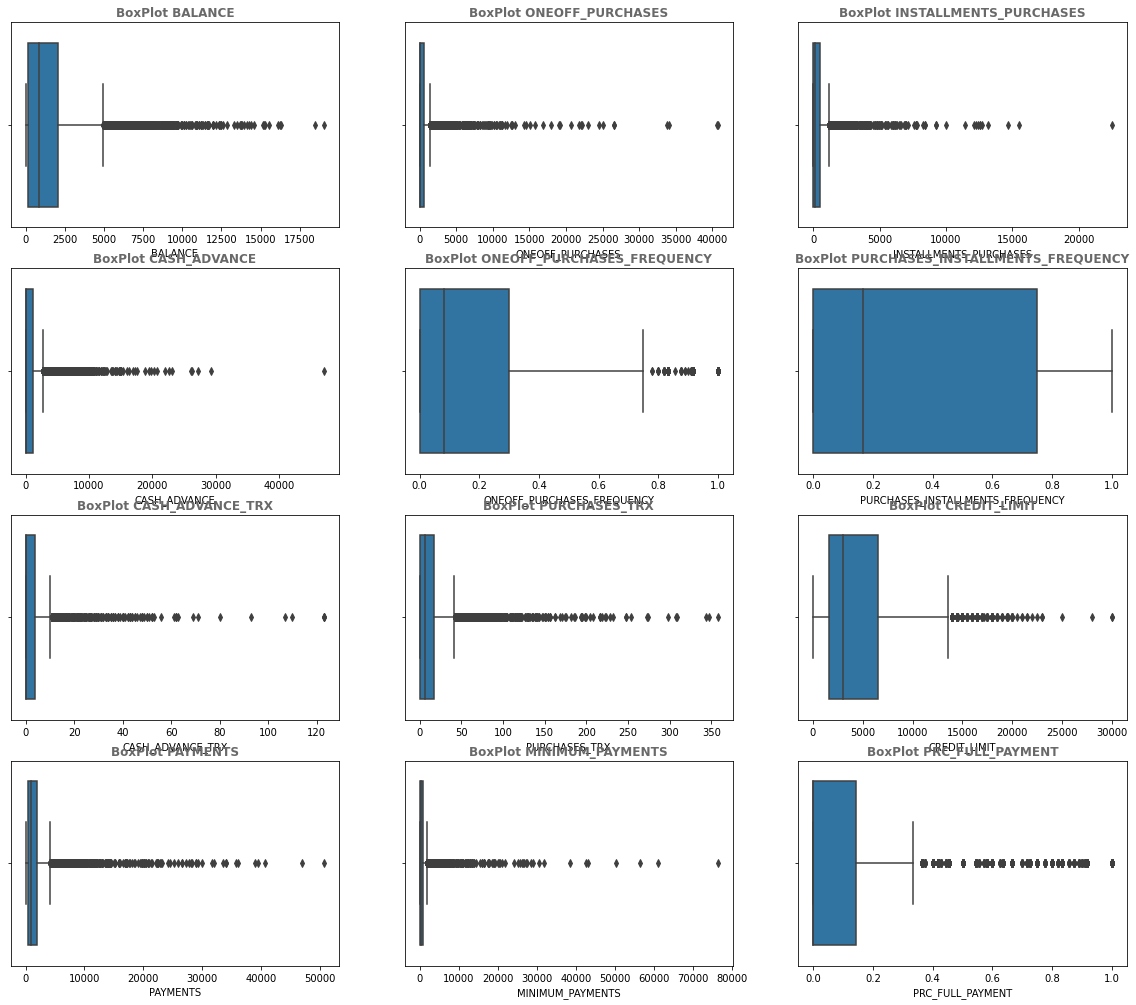

In [61]:
plt.figure(figsize = (20,40))
x = 1
for column in cols:
    plt.subplot(9, 3, x)
    sns.boxplot(df[column])
    plt.title('BoxPlot {}'.format(column), fontsize=12, color ='dimgrey', fontweight = 'bold')
    x += 1


###Checking for the skewness

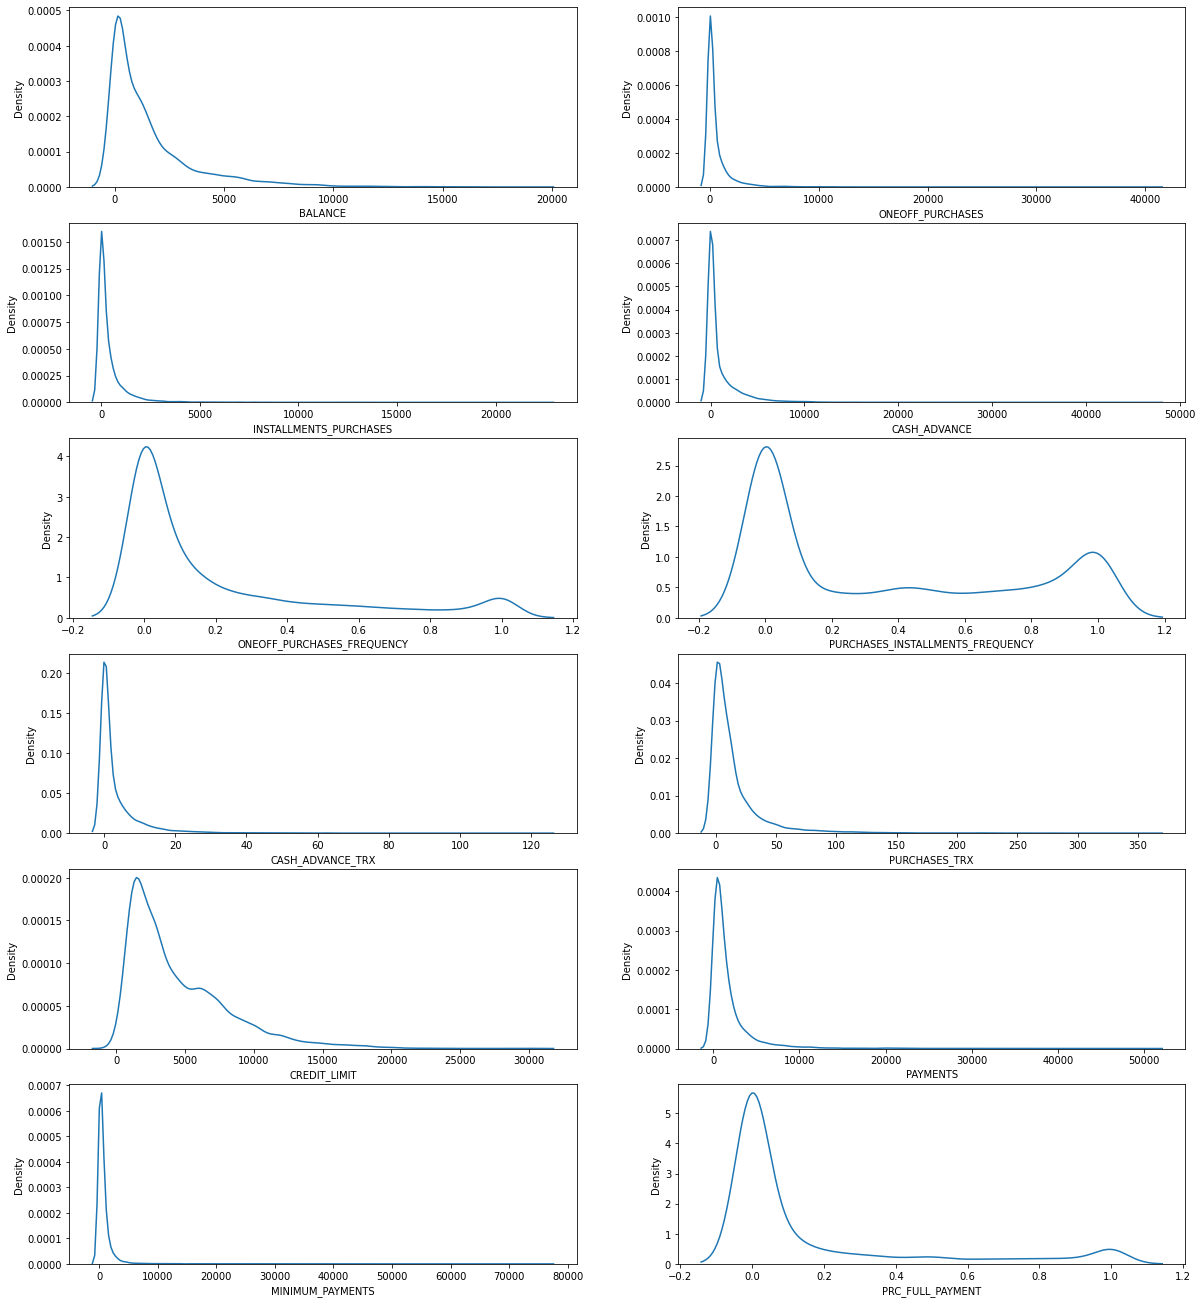

In [62]:
plt.figure(figsize=(20,35))
for i, col in enumerate(cols):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()


### Handling with outliers

In [63]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
df_Test = rb.fit_transform(df)
df_Test = pd.DataFrame(df_Test, columns = df.columns)



In [64]:
df_Test.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,0.358756,-1.103850,0.599631,0.959631,0.687322,0.878882,-0.011514,0.397158,0.263748,0.608134,0.812270,0.481967,0.304990,0.577257,0.762367,1.076124,-0.482065
std,1.080777,2.131185,1.996252,2.872763,1.929752,1.882865,0.481631,0.994484,0.529935,0.900596,1.706247,1.553659,0.742615,1.907230,3.361123,2.047579,1.337134
min,-0.453623,-9.000009,-0.337724,-0.065763,-0.189907,0.000000,-0.600000,-0.277777,-0.222223,0.000000,0.000000,-0.437500,-0.602041,-0.564601,-0.484027,0.000000,-6.000000
25%,-0.386974,-1.000000,-0.300541,-0.065763,-0.189907,0.000000,-0.500000,-0.277777,-0.222223,0.000000,0.000000,-0.375000,-0.285714,-0.312109,-0.237633,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.613026,0.000000,0.699459,0.934237,0.810093,1.000000,0.500000,0.722223,0.777777,1.000000,1.000000,0.625000,0.714286,0.687891,0.762367,1.000000,0.000000
max,9.433744,0.000000,45.477807,70.476178,47.820335,42.318465,0.600000,3.055557,1.111111,6.750007,30.750000,21.937500,5.510204,32.848838,109.701950,7.000007,0.000000


###Checking after using (Robust)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

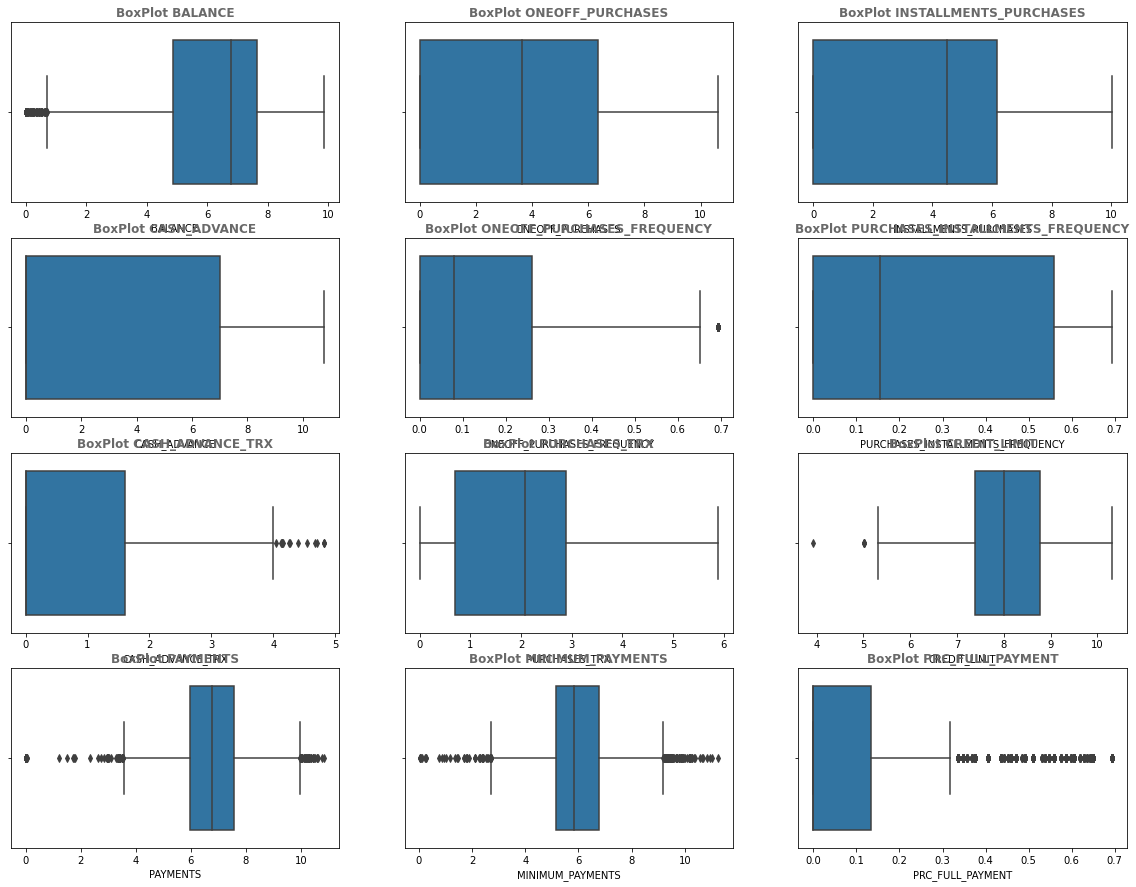

In [65]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY',
        'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
for col in cols:
    df[col] = np.log(1 + df[col])
x=1
plt.figure(figsize=(20,35))
for column in cols:
    plt.subplot(9, 3, x)
    sns.boxplot(df[column])
    plt.title('BoxPlot {}'.format(column), fontsize=12, color ='dimgrey', fontweight = 'bold')
    x += 1

###Testing min_max Scaler

In [66]:
# scaler = MinMaxScaler()
# scaled = scaler.fit_transform(df_Test)
# print(scaled)

###PCA

In [67]:
pca = PCA(n_components = 0.95) 
X_pca = pca.fit_transform(df_Test) 
X_pca = pd.DataFrame(X_pca) 
X_pca.head()

,0,1,2,3,4,5,6,7,8
0,-2.476192,-0.709313,-0.854992,-0.253089,1.209435,0.497249,0.597123,-0.137457,0.531717
1,-0.706226,1.926926,3.738738,1.447214,-1.434645,-0.779973,1.570044,-1.622505,-1.039768
2,-0.087372,-0.398860,-0.488049,-1.844274,1.514844,-0.635356,0.511854,0.326012,-1.477987
3,-0.072204,-0.499594,-0.933113,1.524298,2.730302,0.097191,0.222849,0.657637,0.459694
4,-2.167143,-0.338517,-0.400450,-1.577324,1.028878,-0.201866,0.771886,-0.570382,0.503850


###Test Using DBSCAN

In [68]:
dbscan = DBSCAN(eps=15, min_samples=2)
labels = dbscan.fit_predict(X_pca)
s = silhouette_score(X_pca, labels)
print('Silhoutte score of DBSACN model is ' + str(silhouette_score(X_pca, labels)))




Silhoutte score of DBSACN model is 0.81112111715408


###Test Using K-Means

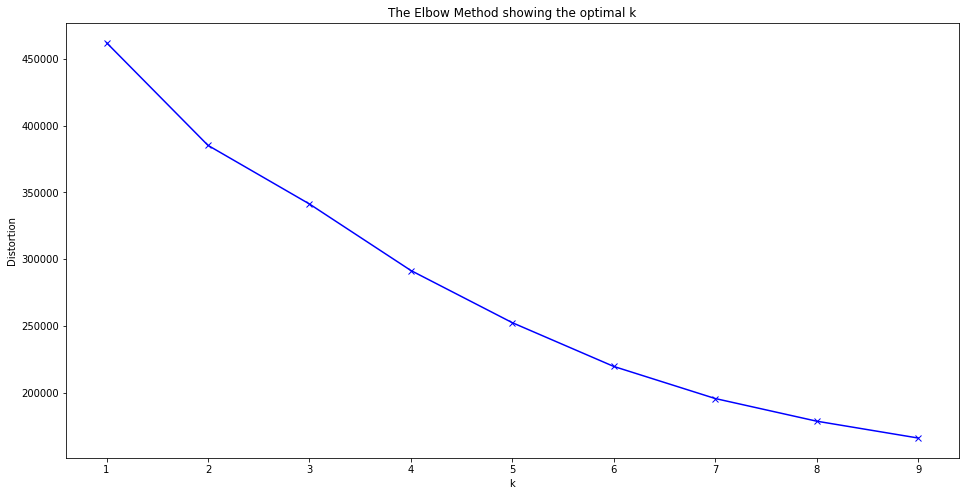

In [69]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_pca)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [70]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)
print('Silhoutte score of K-Means model is ' + str(silhouette_score(X_pca, kmeans.labels_)))


Silhoutte score of K-Means model is 0.5744306701847706


###Test Using Hierarchical

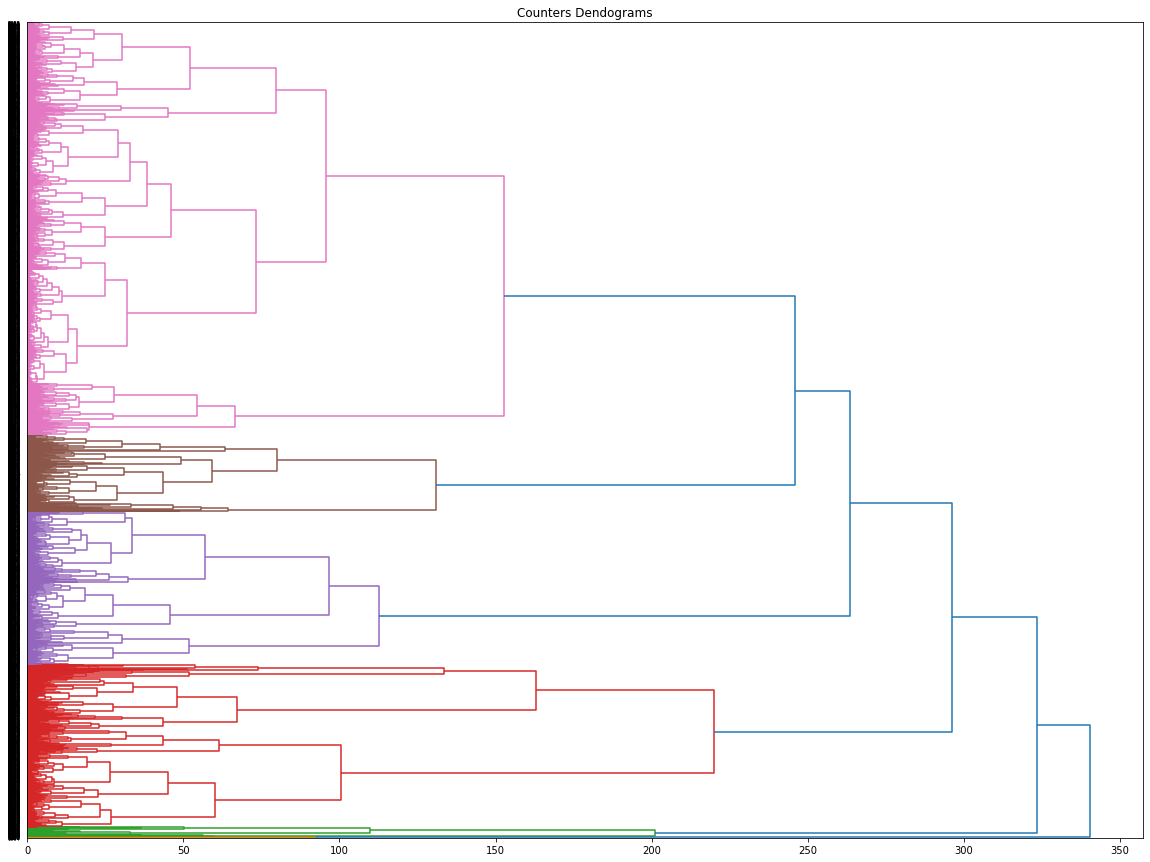

In [71]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 15))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=X_pca, method='ward',metric='euclidean'),orientation='right') 

In [72]:
hc = AgglomerativeClustering(n_clusters=3).fit(X_pca)
hc_labels = hc.labels_
print('Silhoutte score of Hierarchical model is ' + str(silhouette_score(X_pca, hc_labels)))


Silhoutte score of Hierarchical model is 0.7054882537862349


###Test Using GMM

In [73]:
gmm=GaussianMixture(n_components=3).fit(X_pca) 
labels=gmm.predict(X_pca)
print('Silhoutte score of GMM model is ' + str(silhouette_score(X_pca, labels)))


Silhoutte score of GMM model is 0.13067559197608855
